In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drinks = pd.read_csv('../drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [6]:
drinks.info() #대륙에 23개의 null이 존재함을 확인 가능. 소비량은 int로, 총량은 float으로 되어 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [7]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [11]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [12]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [14]:
# 상관도는 수치데이터로만 선별. 
cols = [ 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']

In [34]:
corr=drinks[cols].corr(method = 'pearson') # 피어슨 상관관계도 그리기 
corr #(-1~1 사이 범위에 있음을 확인 가능)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [35]:
#인사이트 3개 적기
# 맥주를 많이 마시는 국가는 전체 알콜 소비량과 큰 상관관계를 가진다.
# 와인과 증류주 사이에는 약한 상관관계가 있다 - 와인을 즐기는 나라에서는 일반적으로 증류주를 즐기지 않는 편이다.
# 그에 비해 맥주소비와 증류주 소비, 와인소비는 모두 유의미한 상관관계가 있다. 
#(맥주를 많이 마시는 사람은 다른 종류의 술도 꽤 마실 가능성이 높다)
#증류주는 와인보다는 맥주 소비와 좀 더 상관이 있다. 
#와인을 많이 마시는 사람이라고 반드시 맥주를 많이 마시는 것은 아님. 하지만 아예 무관하지는 않다. 
# 와인, 증류주, 맥주 중 가장 많은 소비량을 차지하는 것은 맥주이며, 와인=증류주는 유사한 수준이다.


In [36]:
#항목간 상관관계 알 수 있는 방법 1. corr 함수(피어슨) 2. heatmap 그래프 heap 3 pairplot 그래프

In [37]:
import seaborn as sns

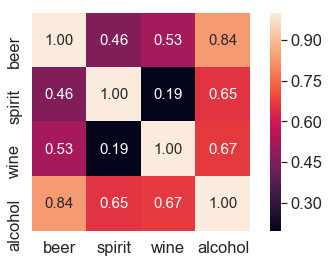

In [48]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

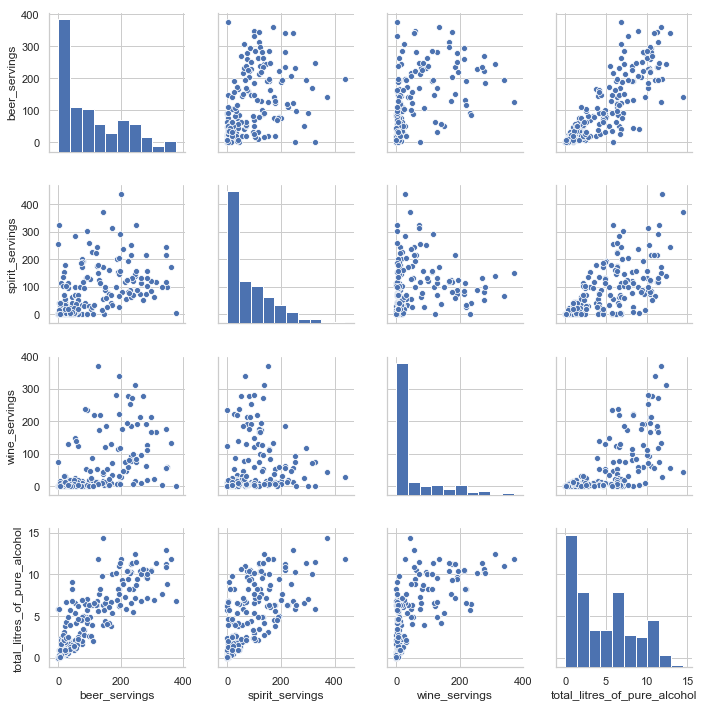

In [46]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5), 
plt.show        

In [50]:
drinks.isnull().sum() # null의 개수. NA(Not available) > 결측치(+이상치)를 모두 NA처리함. 
#NA로 변경한 것을 일괄 처리

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [51]:
drinks['continent']=drinks['continent'].fillna('OT')
# replace : 대체하는 경우. 
# fillna : NA(북아메리카)를 다른 값으로 채우자 > Other의 OT로.
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [67]:
drinks['continent'].value_counts() # cf. groupby, value_counts 그룹별 카운트.

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [68]:
type(drinks['continent'].value_counts())# 타입 확인 > 시리즈 클래스 = index와 values의 결합. 

pandas.core.series.Series

In [69]:
drinks['continent'].value_counts().index.tolist()

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [70]:
drinks['continent'].value_counts().values.tolist() # tolist를 하는게 안전/편리....

[53, 45, 44, 23, 16, 12]

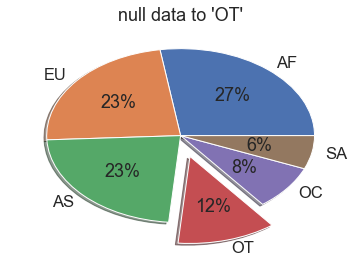

In [66]:
pie_labels=drinks['continent'].value_counts().index.tolist()
pie_values=drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(pie_values, explode=explode, labels=pie_labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

[미니 퀴즈 - 1.2]
위의 예제 코드에서 두 개의 코드 라인이 있습니다. 두 라인은 각각 어떤 값들을 담고 있을까요?
drinks['continent'].value_counts().index.tolist() > 라벨이 될, 대륙별 값의 인덱스들을 리스트로. 시리즈의 인덱스 객체.
drinks['continent'].value_counts().values.tolist() > 값이 될, 대륙별 값의 리스트. 
시리즈가 인덱스 + 벨류의 조합이기 때문에. 

[파이차트에 들어갈 수 있는 것 : 시리즈, 리스트, 인덱스, 어레이]
 - 이 경우에는 아니고 여러 시리즈 항목이 있을 때에 시리즈 통채로 파이차트에 넣을 수 있긴 함. 

plt의 pie 함수는 위의 두 코드라인의 결과값을 사용합니다. fracs1과 labels는 어떤 의미를 가지는 파라미터일까요?
 라벨 
 fracs1

직접 pie 함수를 실행하여 파라미터의 의미를 파악해 봅시다
explode를 이용하여 OT 조각을 분리하는 방법에 대해서도 테스트해봅시다.


# 3. 기술적 통계 = description

In [75]:
#agg 함수. aggregation ([]) 묶어서. 
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [78]:
# 간단한 통계를 통해 데이터를 자세하게 설명해보자
type(result)

pandas.core.frame.DataFrame

In [81]:
result2=drinks.groupby('continent').spirit_servings.mean()
result2


continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [82]:
type(result2)
#개별 함수로 할 경우에는 이렇게 타입이 다르게 나온다. >시리즈로

pandas.core.series.Series

In [80]:
result3=drinks.groupby('continent')['spirit_servings'].mean()
result3

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [83]:
type(result3)
#여기도 시리즈

pandas.core.series.Series

In [85]:
result4=result3[result3>=100] #100보다 큰 경우만 찾아보기
result4
#증류주 평균이 100 보다 높은 곳들만 찾아보기 : 유럽, 북미, 남아프.

continent
EU    132.555556
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [86]:
result4.idxmax()
#r4 값 중에서 제일 큰 max한 값의 index를 리턴 : 증류주 평균 >100 중 가장 많은 곳.

'OT'

In [96]:
beer_cont_sum=drinks.groupby('continent').beer_servings.sum().idxmax()
beer_cont_sum 
# 대륙그룹별 맥주 총 소비량 가장 높은 곳은? 

'EU'

In [94]:
wine_cont=drinks.groupby('continent').wine_servings.max().idxmax()
wine_cont
# 대륙그룹별 와인 최대 소비량 가장 높은 곳은?

'EU'

In [95]:
beer_cont=drinks.groupby('continent').beer_servings.mean().idxmax()
beer_cont
# 대륙그룹별 맥주 평균 소비량 가장 높은 곳은?

'EU'

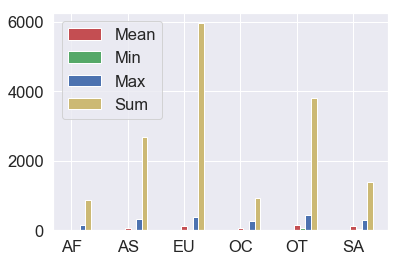

In [99]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')
#x축이 안 겹치게 너비만큼 곱해서 + 더해줌
plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

# 와인

In [101]:
wresult = drinks.groupby('continent').wine_servings.agg(['mean', 'min', 'max', 'sum'])
wresult

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
OT,24.521739,1,100,564
SA,62.416667,1,221,749


In [102]:
type(wresult)

pandas.core.frame.DataFrame

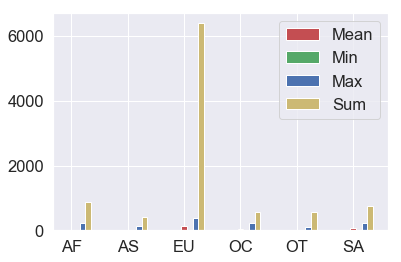

In [105]:
# 대륙별 wine_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(wresult.index)
means = wresult['mean'].tolist()
mins = wresult['min'].tolist()
maxs = wresult['max'].tolist()
sums = wresult['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')
#x축이 안 겹치게 너비만큼 곱해서 + 더해줌
plt.xticks(index, wresult.index.tolist())
plt.legend()
plt.show()

In [106]:
bresult=drinks.groupby('continent').beer_servings.agg(['mean','min','max','sum'])
bresult

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
OT,145.434783,1,285,3345
SA,175.083333,93,333,2101


# 맥주

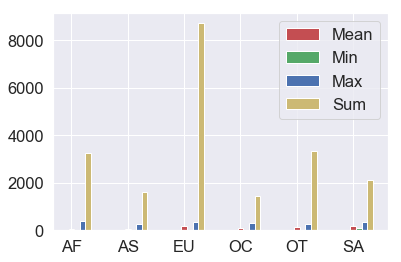

In [107]:
n_groups = len(bresult.index)
means = bresult['mean'].tolist()
mins = bresult['min'].tolist()
maxs = bresult['max'].tolist()
sums = bresult['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')
#x축이 안 겹치게 너비만큼 곱해서 + 더해줌
plt.xticks(index, bresult.index.tolist())
plt.legend()
plt.show()

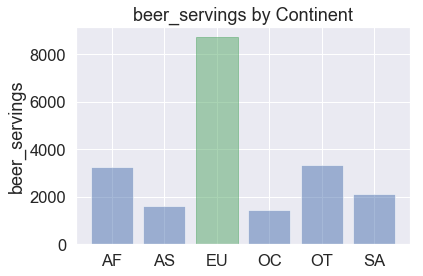

In [113]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('G')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

## 나라별 전체 알콜 소비량 대비 맥주 소비량 > 파생변수를 생성해서 출력
## 전체 평균보다 많은 와인을 마시는 나라는 어디?
## 전체 평균보다 많은 와인을 마시는 나라의 수는?
## 전체 평균보다 많은 와인을 마시는 나라들의 평균은?

In [120]:
drinks['beer_rates']=drinks['beer_servings']/(drinks['wine_servings']+drinks['beer_servings']+drinks['spirit_servings'])
#=                                                    'total_litres_of_pure_alcohol']
drinks['beer_rates']
#나라별 전체 알콜 소비량 대비 맥주 소비량 (맥주 + 와인+ 증류주)

0           NaN
1      0.323636
2      0.641026
3      0.352518
4      0.680251
5      0.370909
6      0.439636
7      0.099526
8      0.478899
9      0.511927
10     0.291667
11     0.349570
12     0.375000
13          NaN
14     0.406250
15     0.254937
16     0.499154
17     0.683117
18     0.666667
19     1.000000
20     0.773148
21     0.295720
22     0.711934
23     0.603448
24     0.911765
25     0.400347
26     0.641026
27     1.000000
28     0.822222
29     0.666667
         ...   
163    0.408946
164    0.957447
165    0.381910
166    0.327434
167    0.089286
168    0.117647
169    0.276536
170    0.484018
171    0.166667
172    0.631579
173    0.580645
174    0.547222
175    0.689189
176    0.637500
177    0.155738
178    0.107143
179    0.833333
180    0.422131
181    0.102564
182    0.405556
183    0.837209
184    0.507128
185    0.310811
186    0.186567
187    0.420000
188    0.763761
189    0.973684
190    1.000000
191    0.581818
192    0.744186
Name: beer_rates, Length

In [123]:
drinks['beer_rates_1']=drinks['beer_servings']/(drinks['total_litres_of_pure_alcohol'])
drinks['beer_rates_1']
#나라별 전체 알콜 소비량 대비 맥주 소비량 (맥주 + 와인+ 증류주)

0            NaN
1      18.163265
2      35.714286
3      19.758065
4      36.779661
5      20.816327
6      23.253012
7       5.526316
8      25.096154
9      28.762887
10     16.153846
11     19.365079
12     21.000000
13           NaN
14     22.698413
15      9.861111
16     28.095238
17     38.676471
18     30.909091
19     57.500000
20     43.947368
21     16.521739
22     32.037037
23     34.027778
24     51.666667
25     22.427184
26      5.813953
27     13.968254
28      9.250000
29     36.000000
         ...    
163    22.857143
164    19.148936
165    21.111111
166    18.137255
167     5.000000
168     6.666667
169    15.468750
170    27.179487
171    10.000000
172    27.692308
173    32.727273
174    30.781250
175    39.230769
176    36.428571
177     8.636364
178     6.000000
179     5.421687
180    23.146067
181     5.714286
182    21.057692
183     6.315789
184    28.620690
185    17.424242
186    10.416667
187    23.333333
188    43.246753
189    55.500000
190    60.0000

In [118]:
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean>=total_mean]
print(continent_over_mean)
# 전체 평균보다 많은 와인을 마시는 대륙은 세 곳...으로 나옴. 

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [135]:
drinks.wine_servings.mean() # 와인의 평균

49.45077720207254

In [132]:
continent_over_mean.count() 
#나라는? 55개
total_wine_mean = drinks.wine_servings.mean()
wine_con_mean=drinks.groupby('country')['wine_servings'].mean()
wine_con_over_mean = wine_con_mean[wine_con_mean>=total_wine_mean]
wine_con_over_mean


country
Albania                 54
Andorra                312
Argentina              221
Australia              212
Austria                191
Bahamas                 51
Belgium                212
Bulgaria                94
Canada                 100
Chile                  172
Cook Islands            74
Croatia                254
Cyprus                 113
Czech Republic         134
Denmark                278
Equatorial Guinea      233
Estonia                 59
Finland                 97
France                 370
Gabon                   59
Georgia                149
Germany                175
Greece                 218
Hungary                185
Iceland                 78
Ireland                165
Italy                  237
Laos                   123
Latvia                  62
Lithuania               56
Luxembourg             271
Macedonia               86
Malta                  120
Montenegro             128
Netherlands            190
New Zealand            175
Norway              

In [133]:
wine_con_mean

country
Afghanistan               0
Albania                  54
Algeria                  14
Andorra                 312
Angola                   45
Antigua & Barbuda        45
Argentina               221
Armenia                  11
Australia               212
Austria                 191
Azerbaijan                5
Bahamas                  51
Bahrain                   7
Bangladesh                0
Barbados                 36
Belarus                  42
Belgium                 212
Belize                    8
Benin                    13
Bhutan                    0
Bolivia                   8
Bosnia-Herzegovina        8
Botswana                 35
Brazil                   16
Brunei                    1
Bulgaria                 94
Burkina Faso              7
Burundi                   0
Cabo Verde               16
Cambodia                  1
                       ... 
Sudan                     0
Suriname                  7
Swaziland                 2
Sweden                  186
Switzerland 

In [134]:
print(len(wine_con_over_mean))
## 전체 평균보다 많은 와인을 마시는 나라의 수는?


55


In [131]:
wine_con_over_mean.mean() # 전체 평균보다 많은 와인을 마시는 나라들의 평균은?

154.27272727272728

In [185]:
con_beer_rank = drinks[['country', 'beer_servings', 'continent']]

In [186]:
con_beer_rank.sort_values(by=['beer_servings'], ascending=False).head(15)

,country,beer_servings,continent
117,Namibia,376,AF
45,Czech Republic,361,EU
62,Gabon,347,AF
65,Germany,346,EU
98,Lithuania,343,EU
135,Poland,343,EU
188,Venezuela,333,SA
81,Ireland,313,EU
129,Palau,306,OC
140,Romania,297,EU


In [187]:
beer15=con_beer_rank.sort_values(by=['beer_servings'], ascending=False).head(15)
beer15

,country,beer_servings,continent
117,Namibia,376,AF
45,Czech Republic,361,EU
62,Gabon,347,AF
65,Germany,346,EU
98,Lithuania,343,EU
135,Poland,343,EU
188,Venezuela,333,SA
81,Ireland,313,EU
129,Palau,306,OC
140,Romania,297,EU


In [188]:
beer15.isin(['South Korea'])

,country,beer_servings,continent
117,False,False,False
45,False,False,False
62,False,False,False
65,False,False,False
98,False,False,False
135,False,False,False
188,False,False,False
81,False,False,False
129,False,False,False
140,False,False,False


In [189]:
print(con_beer_rank)

                  country  beer_servings continent
0             Afghanistan              0        AS
1                 Albania             89        EU
2                 Algeria             25        AF
3                 Andorra            245        EU
4                  Angola            217        AF
5       Antigua & Barbuda            102        OT
6               Argentina            193        SA
7                 Armenia             21        EU
8               Australia            261        OC
9                 Austria            279        EU
10             Azerbaijan             21        EU
11                Bahamas            122        OT
12                Bahrain             42        AS
13             Bangladesh              0        AS
14               Barbados            143        OT
15                Belarus            142        EU
16                Belgium            295        EU
17                 Belize            263        OT
18                  Benin      

In [190]:
result_rank=drinks['beer_servings'].rank(method='max')

In [191]:
result_rank[0]

15.0

In [192]:
con_beer_rank['country'][con_beer_rank['country']=='South Korea']

138    South Korea
Name: country, dtype: object

In [193]:
beer_sort_result= con_beer_rank.sort_values(['beer_servings'], axis=0, ascending=False)

In [194]:
beer_sort_result.reset_index(drop=False, inplace=True)
beer_sort_result

,index,country,beer_servings,continent
0,117,Namibia,376,AF
1,45,Czech Republic,361,EU
2,62,Gabon,347,AF
3,65,Germany,346,EU
4,98,Lithuania,343,EU
5,135,Poland,343,EU
6,188,Venezuela,333,SA
7,81,Ireland,313,EU
8,129,Palau,306,OC
9,140,Romania,297,EU


In [195]:
beer_sort_result[beer_sort_result['country']=='South Korea'].index 
#인덱스로 남한은 65. 순위는 +1 : 66위

Int64Index([65], dtype='int64')

In [196]:
drinks['country'][drinks['country']=='South Korea']

138    South Korea
Name: country, dtype: object

In [197]:
as_beer_rank = beer_sort_result[beer_sort_result['continent'] == 'AS']
# 아시아의 맥주소비량 순위를 찾아보자
as_beer_rank

,index,country,beer_servings,continent
22,141,Russian Federation,247,AS
65,138,South Korea,140,AS
70,87,Kazakhstan,124,AS
74,189,Vietnam,111,AS
79,169,Thailand,99,AS
90,36,China,79,AS
92,85,Japan,77,AS
93,112,Mongolia,77,AS
97,134,Philippines,71,AS
100,82,Israel,63,AS


In [199]:
!dir
#명령 실행

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: CCE2-EC5A

 C:\Users\tjoeun709-12\Documents\data\data15 디렉터리

2021-05-04  오후 04:20    <DIR>          .
2021-05-04  오후 04:20    <DIR>          ..
2021-05-04  오후 02:34           979,968 (붙임2) 공공데이터 공통표준용어 관리 기준(2020.12.).hwp
2021-05-04  오전 10:07    <DIR>          .ipynb_checkpoints
2021-05-04  오전 10:06           619,180 02-drinks-eda.html
2021-05-04  오전 10:06           311,733 02-drinks-eda.ipynb
2021-05-04  오후 04:20           395,678 0504-alchol.ipynb
2021-05-04  오후 03:31           609,247 국가별음주데이터분석 (1).html
2021-05-04  오후 01:08             1,857 한국건강증진개발원_절주(성인의 음주행동유형)_19세 이상 성인의 평생 음주율_20200923.csv
               6개 파일           2,917,663 바이트
               3개 디렉터리  721,276,047,360 바이트 남음


In [201]:
!pip install scipy
#scipy 설치 : !후 명령 실행

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [202]:
africa= drinks.loc[drinks['continent']=='AF']
europe= drinks.loc[drinks['continent']=='EU']

In [203]:
from scipy import stats

In [206]:
stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
# t-test 실행. p value(유의화률가능성)이 0가설일 확률 = 5% 이하로 있어서 가설.
#e-11이므로 소수점 이하 11개

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [205]:
#아프리카와 유럽 간의 평균 차이가 의미가 있다. > 대립가설이 채택. 
#대립가설: 맥주 소비량에는 대륙 차이가 반영된다. 
# > 아프리카와 유럽의 국가별 맥주 소비량 차이가 있다.
#영가설: 대륙간 맥주 소비량은 차이가 없다 (가능성 5% 미만 인 경우. )

(4) 유의확률 (p-value , 확률)

통계적 가설 검정에서 유의 확률(有意 確率, 영어: significance probability, asymptotic significance) 또는 p-값(영어: p-value, probability value)은 귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 실제로 관측될 확률이다. 실험의 유의확률은 실험의 표본 공간에서 정의되는 확률변수로서, 0~1 사이의 값을 가진다.

-정의 : 1. 얻은 검정통계량의 값보다 더 확실하게 귀무가설을 기각할 검정통계량의 값을 얻을 확률

          2. 유의확률이 작다면 현재 수집한 증거보다 더 확실한 증거를 확보할 수 없다는 의미로써 현재 수집한 증거가 충분(현재 증거로도 H0을 기각할 수 있다)하다는 의미이다.

- p-value값이 작을수록 H1 지지,채택가능성이 올라감